# Business task

To explore the dataset by carrying out exploratory data analysis to derive insights on student performance in exams.

# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df = pd.read_csv('Downloads\\StudentsPerformance.csv')

# Dataset overview and statistical summary

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


# Data cleaning

In [6]:
#check for null values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no null values in the dataset.

In [7]:
# correcting the column names by replacing spaces with underscores
df.rename(columns={'parental level of education':'parental_level_of_education','test preparation course':'test_preparation_course','math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [8]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

# Exploratory Data Analysis

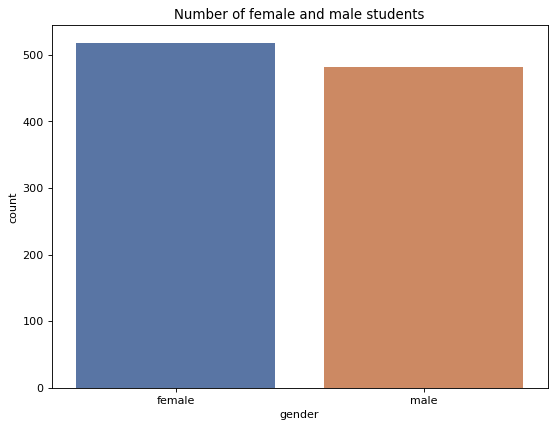

In [9]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=df,x='gender',palette='deep')
plt.title('Number of female and male students');

Female students are more in number than male students.

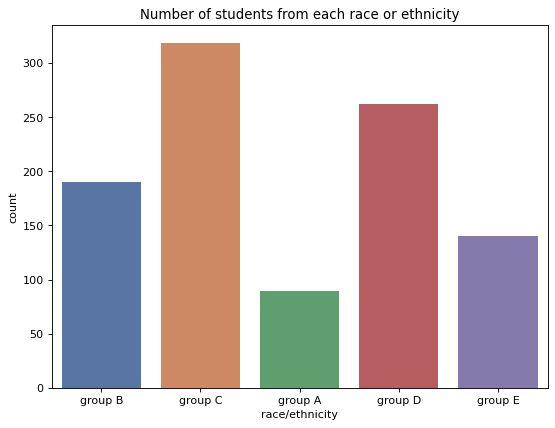

In [10]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=df,x='race/ethnicity',palette='deep')
plt.title('Number of students from each race or ethnicity');

Students that belong to group C are highest, whereas group A is the lowest.

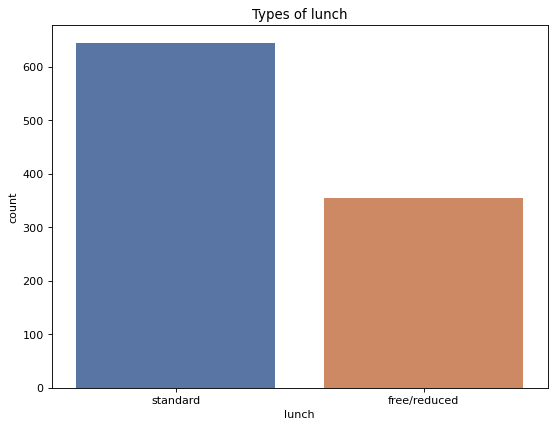

In [11]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=df,x='lunch',palette='deep')
plt.title('Types of lunch');

Students who got standard lunch are more than students who got free/reduced lunch.

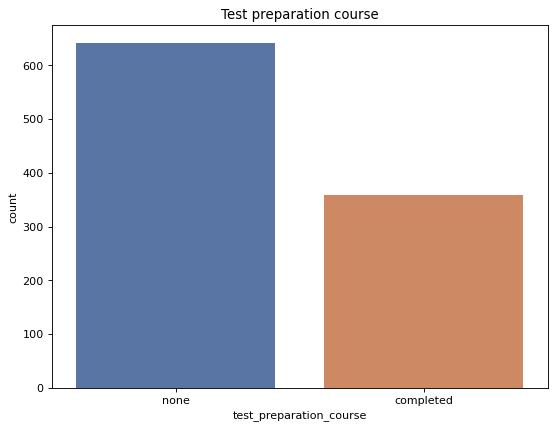

In [12]:
plt.figure(figsize=(8,6),dpi=80)
sns.countplot(data=df,x='test_preparation_course',palette='deep')
plt.title('Test preparation course');

Students that took test preparation course are less than students who didn't.

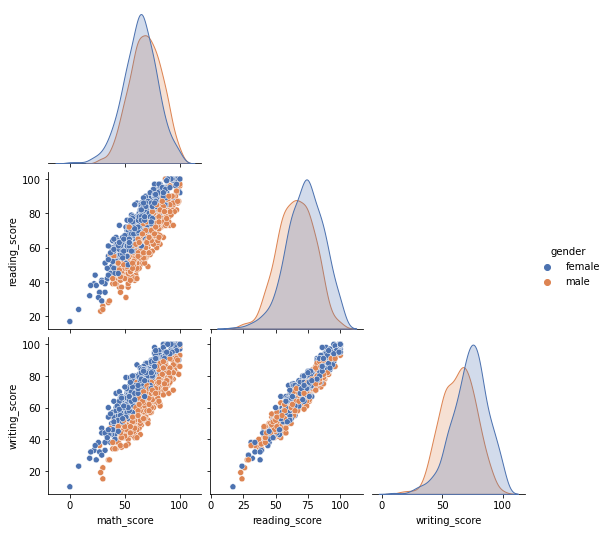

In [13]:
# understanding the relation between scores for each gender
sns.pairplot(df[['math_score','reading_score','writing_score','gender']],hue='gender',corner=True,palette='deep');

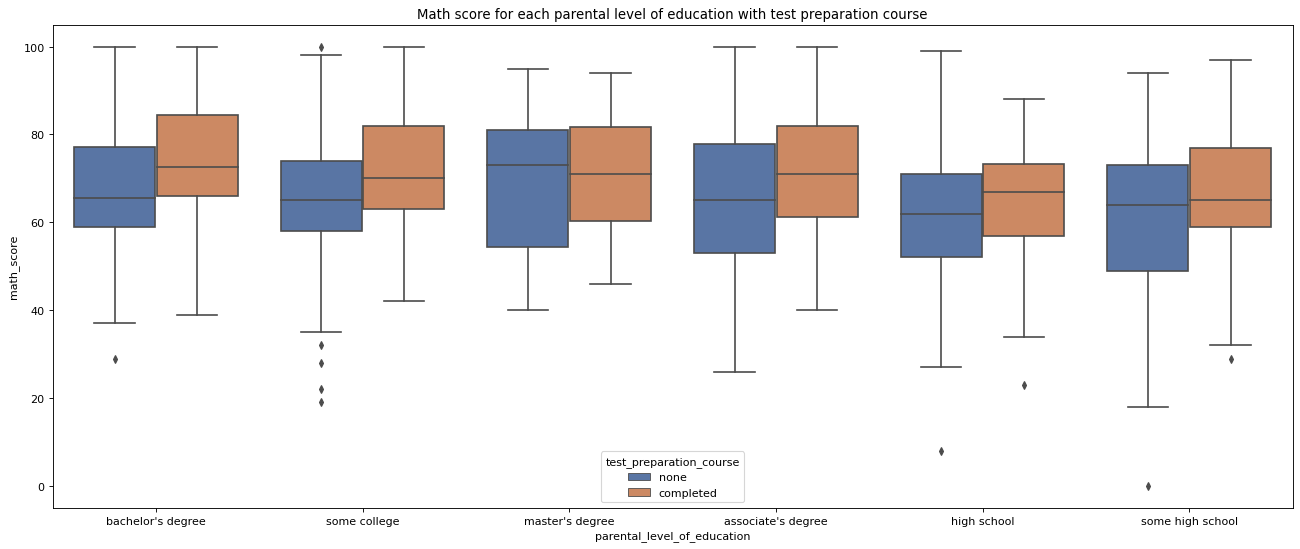

In [14]:
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(data=df,x='parental_level_of_education',y='math_score',hue = 'test_preparation_course',palette='deep')
plt.title('Math score for each parental level of education with test preparation course');

Median math score of students who's parents have master's degree and did no test preparation course has highest median value.

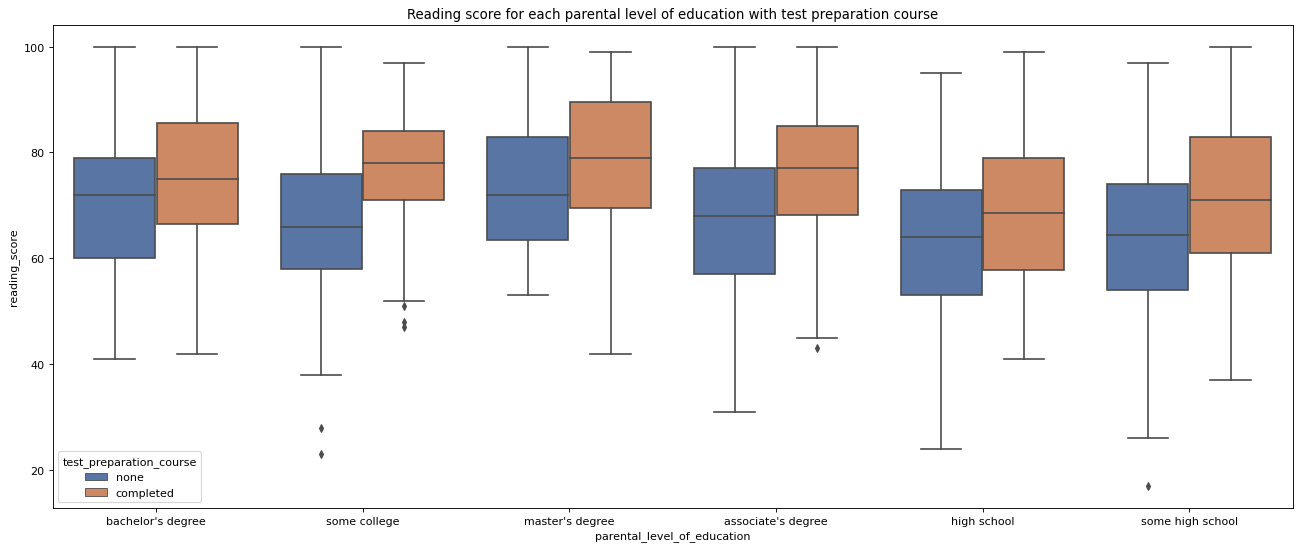

In [15]:
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(data=df,x='parental_level_of_education',y='reading_score',hue = 'test_preparation_course',palette='deep')
plt.title('Reading score for each parental level of education with test preparation course');

Median reading score of students who's parents have master's degree and did test preparation course has highest median value.

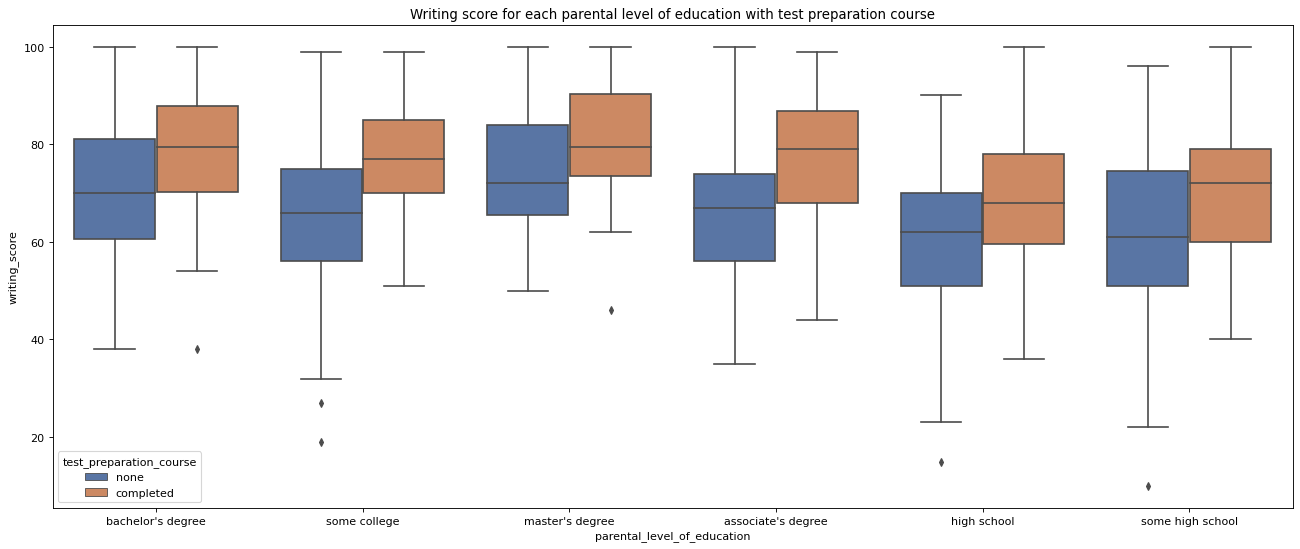

In [16]:
plt.figure(figsize=(20,8),dpi=80)
sns.boxplot(data=df,x='parental_level_of_education',y='writing_score',hue = 'test_preparation_course',palette='deep')
plt.title('Writing score for each parental level of education with test preparation course');

Median writing score of students who's parents have bachelor's degree and did test preparation course has highest median value.

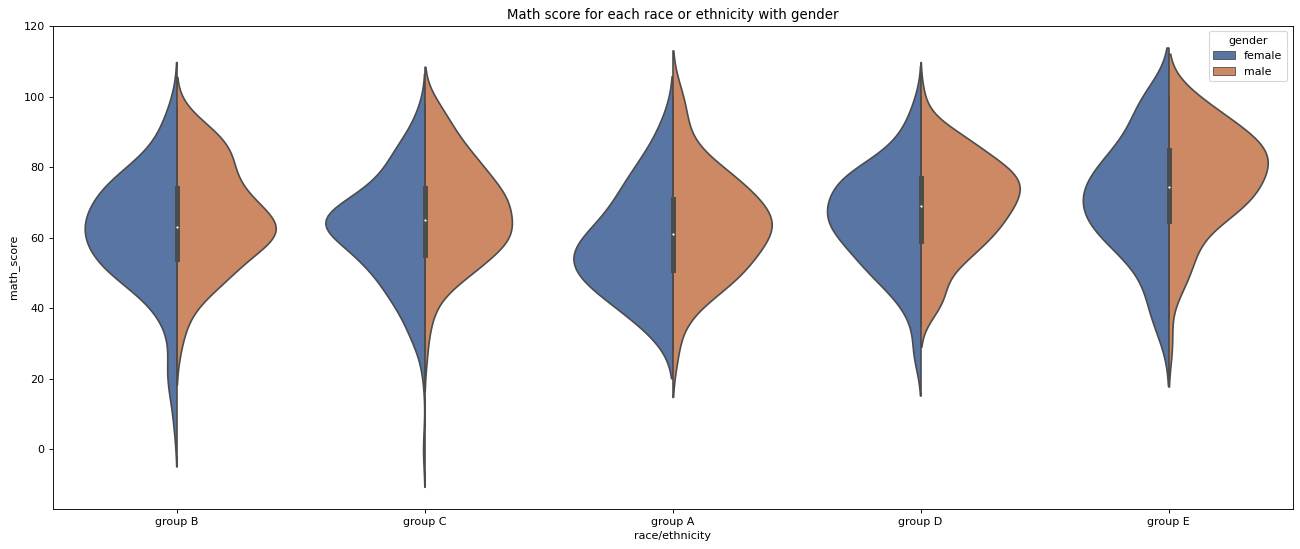

In [18]:
plt.figure(figsize=(20,8),dpi=80)
sns.violinplot(data=df,x='race/ethnicity',y='math_score',hue = 'gender',palette='deep',split=True)
plt.title('Math score for each race or ethnicity with gender');

Majority of male students from group E race have math score between 70 to 90 

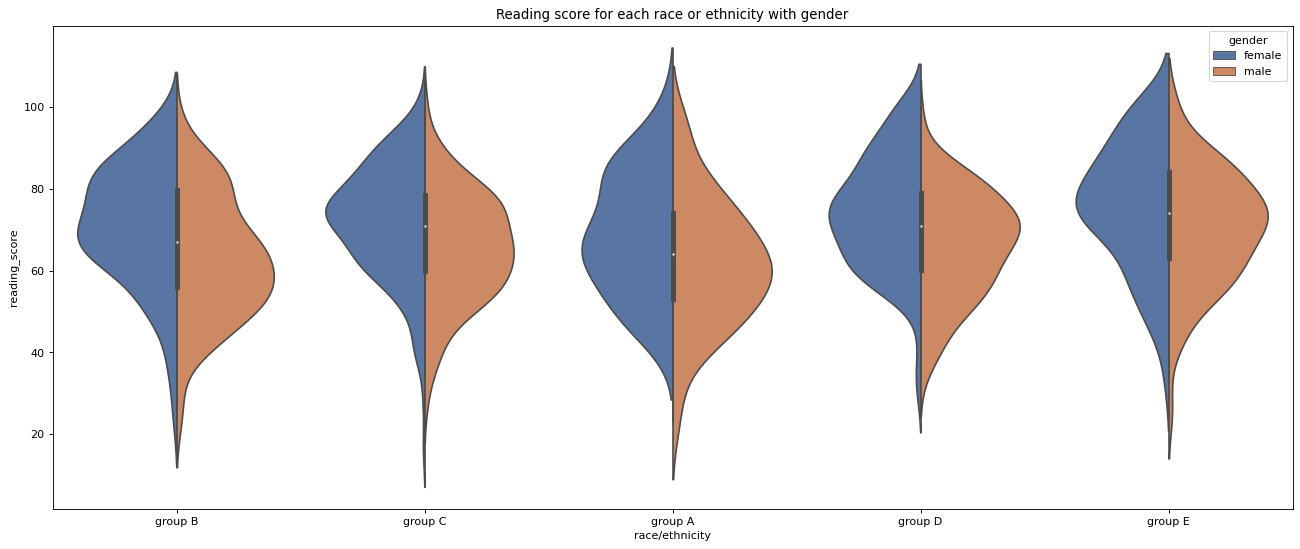

In [19]:
plt.figure(figsize=(20,8),dpi=80)
sns.violinplot(data=df,x='race/ethnicity',y='reading_score',hue = 'gender',palette='deep',split=True)
plt.title('Reading score for each race or ethnicity with gender');

Female students from all groups of race/ethnicity have higher reading score than male students.

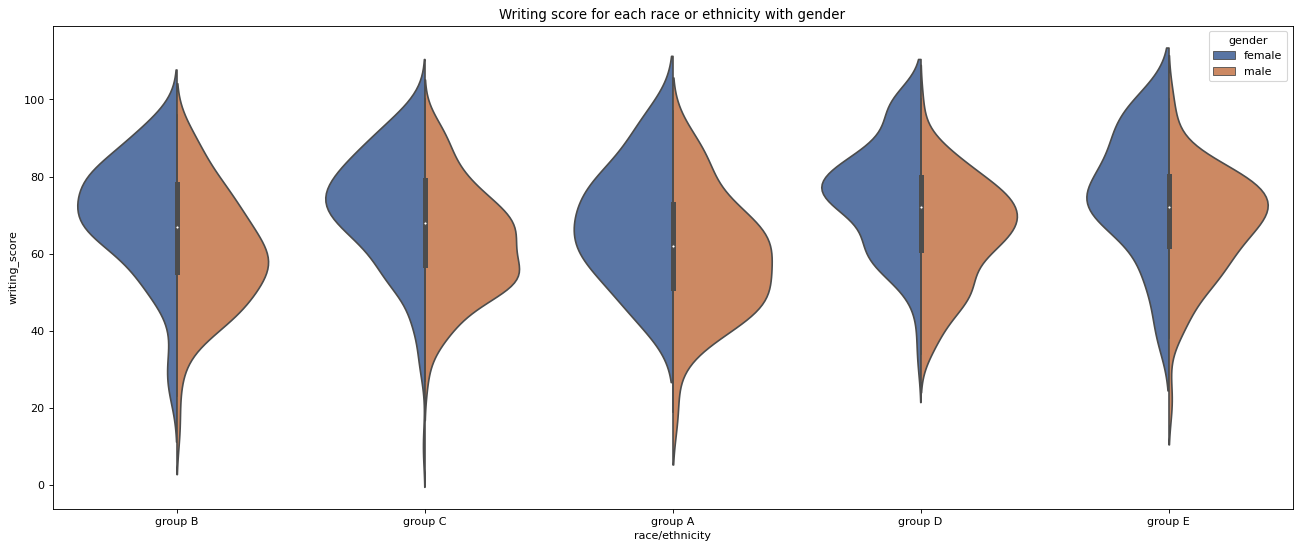

In [20]:
plt.figure(figsize=(20,8),dpi=80)
sns.violinplot(data=df,x='race/ethnicity',y='writing_score',hue = 'gender',palette='deep',split=True)
plt.title('Writing score for each race or ethnicity with gender');

All female students excluding group E have better and higher writing scores than male students.

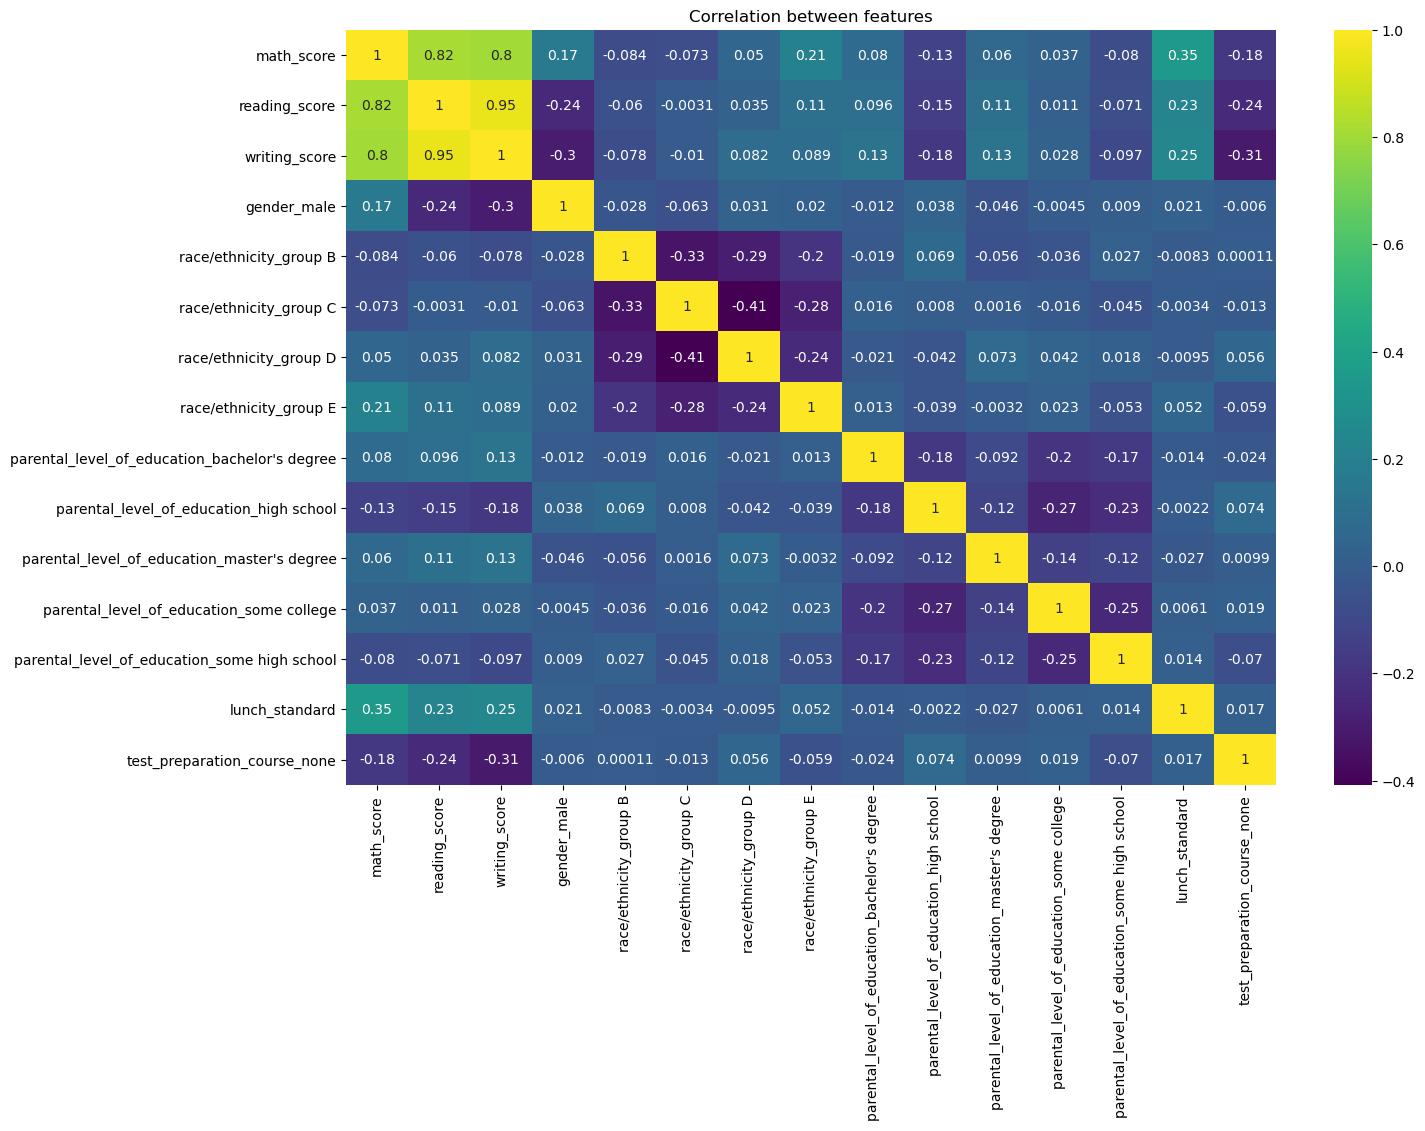

In [22]:
plt.figure(figsize=(15,10),dpi=100)
sns.heatmap(pd.get_dummies(df,drop_first=True).corr(),cmap='viridis',annot=True)
plt.title('Correlation between features');

Reading score and Writing score are highly positively correlated.

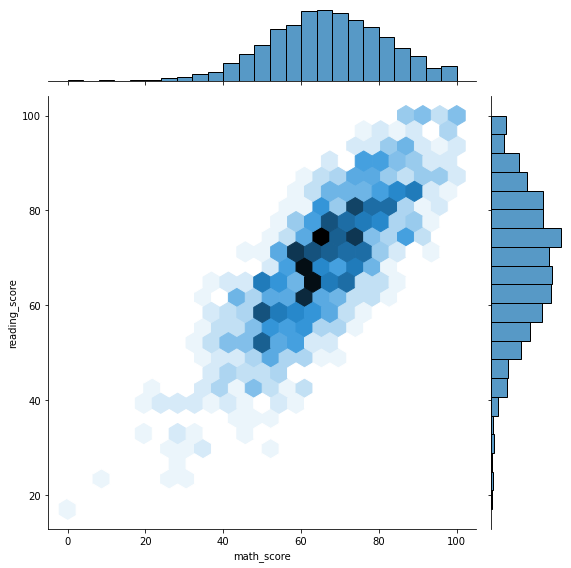

In [26]:
sns.jointplot(data=df,x='math_score',y='reading_score',kind='hex',height=8,palette='deep');

The maximum distribution of reading and math score fall between 60 and 80.

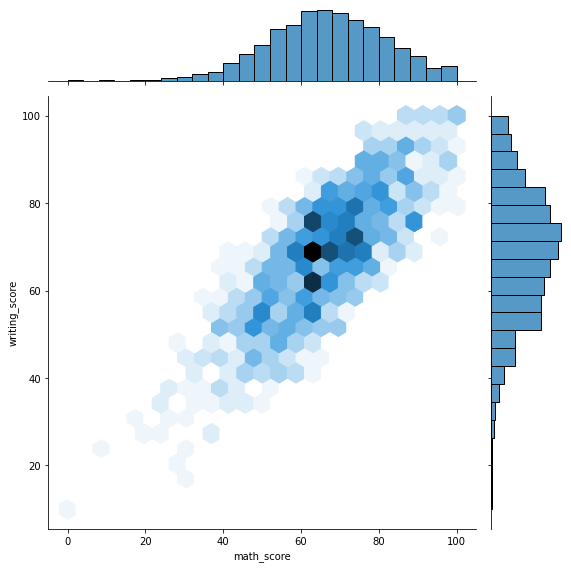

In [27]:
sns.jointplot(data=df,x='math_score',y='writing_score',kind='hex',height=8,palette='deep')

The maximum distribution of writing and math score fall between 60 and 80.

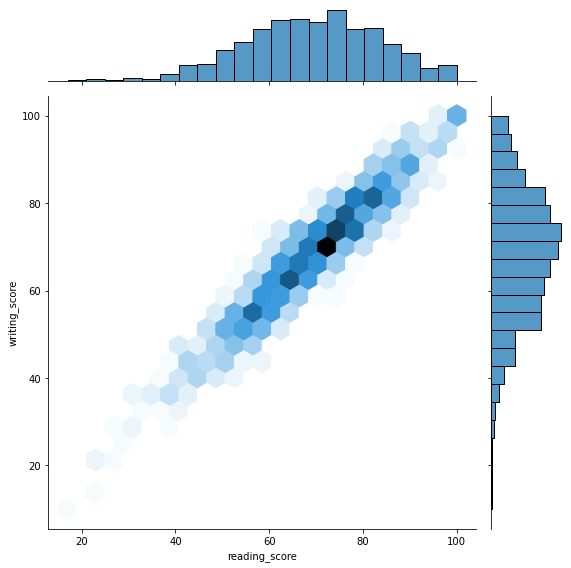

In [28]:
sns.jointplot(data=df,x='reading_score',y='writing_score',kind='hex',height=8,palette='deep')

The maximum distribution of writing and reading score fall between 70 to 80.

In [29]:
df.groupby('test_preparation_course').mean()

,math_score,reading_score,writing_score
test_preparation_course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


Mean of Math, reading and writing score of students that did test preparation course is relatively higher than students who did not.

**Thank you!**